In [2]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("C:/Users/luizf/Desktop/MINDS/Datasets/energydata_complete.csv")
data.pop('date')
data.pop('rv1')
data.pop('rv2')
data.pop('T9')
data.pop('T6')
data.pop('Windspeed')
X=data.copy()
X.drop(data.tail(1).index,inplace=True)
X
y=data.copy()
y.loc[max(y.index)+1, :] = None
y=y.shift(-1)
y.dropna(inplace=True)
y

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Visibility,Tdewpoint
0,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.200000,41.560000,18.2000,48.863333,45.5600,6.483333,733.6,92.000000,59.166667,5.200000
1,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.200000,41.433333,18.2000,48.730000,45.5000,6.366667,733.7,92.000000,55.333333,5.100000
2,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.133333,41.290000,18.1000,48.590000,45.4000,6.250000,733.8,92.000000,51.500000,5.000000
3,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.200000,41.230000,18.1000,48.590000,45.4000,6.133333,733.9,92.000000,47.666667,4.900000
4,50.0,40.0,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,17.133333,41.260000,18.1000,48.590000,45.2900,6.016667,734.0,92.000000,43.833333,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19729,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.500000,44.500000,24.7000,50.074000,46.7900,22.733333,755.2,55.666667,23.666667,13.333333
19730,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.557143,44.414286,24.7000,49.790000,46.7900,22.600000,755.2,56.000000,24.500000,13.300000
19731,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.540000,44.400000,24.7000,49.660000,46.7900,22.466667,755.2,56.333333,25.333333,13.266667
19732,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,24.500000,44.295714,24.6625,49.518750,46.8175,22.333333,755.2,56.666667,26.166667,13.233333


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test = train_test_split(X, test_size=0.25, shuffle=False)
X_train, X_val = train_test_split(X_train, test_size=0.15, shuffle=False)
X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
train_loader = torch.utils.data.DataLoader(torch.tensor(X_train.astype(np.float32)), batch_size=32)
val_loader = torch.utils.data.DataLoader(torch.tensor(X_val.astype(np.float32)), batch_size=32)

y_train, y_test = train_test_split(y, test_size=0.25, shuffle=False)
y_train, y_val = train_test_split(y_train, test_size=0.15, shuffle=False)
y_train = scaler.fit_transform(y_train.values)
y_val = scaler.fit_transform(y_val.values)
if torch.cuda.is_available():
    y_train_t= torch.tensor(y_train.astype(np.float32)).cuda()
    y_val_t = torch.tensor(y_val.astype(np.float32)).cuda()
else:
    y_train_t = torch.tensor(y_train.astype(np.float32))
    y_val_t = torch.tensor(y_val.astype(np.float32))


In [18]:
X

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Visibility,Tdewpoint
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.200000,41.626667,18.200000,48.900000,45.5300,6.600000,733.5,92.000000,63.000000,5.300000
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.200000,41.560000,18.200000,48.863333,45.5600,6.483333,733.6,92.000000,59.166667,5.200000
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.200000,41.433333,18.200000,48.730000,45.5000,6.366667,733.7,92.000000,55.333333,5.100000
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.133333,41.290000,18.100000,48.590000,45.4000,6.250000,733.8,92.000000,51.500000,5.000000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.200000,41.230000,18.100000,48.590000,45.4000,6.133333,733.9,92.000000,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19729,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,...,24.500000,44.764286,24.666667,50.445000,46.7450,22.866667,755.2,55.333333,22.833333,13.366667
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.500000,44.500000,24.700000,50.074000,46.7900,22.733333,755.2,55.666667,23.666667,13.333333
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.557143,44.414286,24.700000,49.790000,46.7900,22.600000,755.2,56.000000,24.500000,13.300000
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.540000,44.400000,24.700000,49.660000,46.7900,22.466667,755.2,56.333333,25.333333,13.266667


In [5]:
#lr decay

#batch norm
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim,nonlinearity='tanh', batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        if torch.cuda.is_available():
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()
        else:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [6]:
torch.manual_seed(1)
alpha = 5
h=round(X_train.shape[0]/(alpha * (X_train.shape[1]*2)))
model = RNNModel(X_train.shape[1],h, 1,X_train.shape[1],0.0)
if torch.cuda.is_available():
    model = model.cuda()
else:
    model = model.cuda()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-5)
buffer = 10000
steplr = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)
epochs = 320

min_valid_loss=500
for epoch in range(epochs):
    aux,aux2=0,0
    train_loss=0.0
    model.train()
    for batch, d in enumerate(train_loader):
        if torch.cuda.is_available():
            d=d.cuda()

        optimizer.zero_grad()  #set gradient to 0
        output = model(d.reshape(-1, d.shape[1]).unsqueeze(1))  #make a prediction
        if torch.cuda.is_available():
            loss = criterion(output, y_train_t[aux:aux+d.shape[0]])
        else:
            loss = criterion(output, torch.tensor(y_train_t[aux:aux+d.shape[0]].astype(np.float32)))  #calculate the loss
        loss.backward()  #differentiate loss with respect to parameters
        optimizer.step() #apply the method step and updates the parameters 
        train_loss += loss.item()
        aux+=d.shape[0]
    steplr.step()
    valid_loss = 0.0
    model.eval() 
    for dv in val_loader:    
        target = model(dv.unsqueeze(1).cuda())
        if torch.cuda.is_available():
            val_loss = criterion(target, y_val_t[aux2:aux2+dv.shape[0]])
        else:
            val_loss = criterion(target,torch.tensor(y_val_t[aux2:aux2+dv.shape[0]].astype(np.float32)))
        valid_loss += val_loss.item()
        aux2+=dv.shape[0]
    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(val_loader)}')
    if valid_loss < buffer:
        buffer = valid_loss

print (buffer/len(val_loader))   
    #if min_valid_loss > valid_loss:
     #   print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f})')
      #  min_valid_loss = valid_loss

Epoch 1 		 Training Loss: 0.023215374517547637 		 Validation Loss: 0.038766618498734064
Epoch 2 		 Training Loss: 0.009947906281659615 		 Validation Loss: 0.027286486846527885
Epoch 3 		 Training Loss: 0.006539626488300173 		 Validation Loss: 0.023477814439684153
Epoch 4 		 Training Loss: 0.004851606227150234 		 Validation Loss: 0.021378284453281333
Epoch 5 		 Training Loss: 0.003884928127018579 		 Validation Loss: 0.01996991011713232
Epoch 6 		 Training Loss: 0.0032879179295567267 		 Validation Loss: 0.0187290757894516
Epoch 7 		 Training Loss: 0.002879874942987344 		 Validation Loss: 0.017451086028345993
Epoch 8 		 Training Loss: 0.0025661798717919737 		 Validation Loss: 0.01592667986239706
Epoch 9 		 Training Loss: 0.0022919079197835424 		 Validation Loss: 0.01417277077479022
Epoch 10 		 Training Loss: 0.0020425076566005437 		 Validation Loss: 0.012298039726114698
Epoch 11 		 Training Loss: 0.001822014035598545 		 Validation Loss: 0.0104702321014234
Epoch 12 		 Training Loss: 0.0016

In [7]:
model.eval()
if torch.cuda.is_available():
    test_norm= torch.tensor(scaler.fit_transform(X_test.values.astype(np.float32))).cuda()
else:
    test_norm= torch.tensor(scaler.fit_transform(X_test.values.astype(np.float32)))
y_norm = scaler.fit_transform(y_test.values)
#yhat=scaler.inverse_transform(model(test_norm.unsqueeze(1)).detach().numpy())
yhat=model(test_norm.unsqueeze(1)).detach().cpu().numpy()
#y=scaler.inverse_transform(test_norm.detach().numpy())[:,0]

from pyFTS.benchmarks import Measures
buffer=[Measures.rmse(y_norm[:,i],yhat[:,i]) for i in range (X.shape[1])]
result = np.mean(buffer)
print (result)

0.025024471574034736


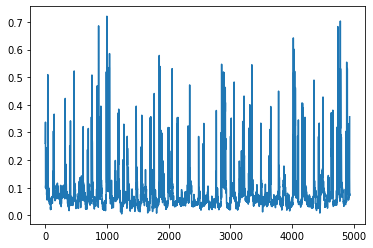

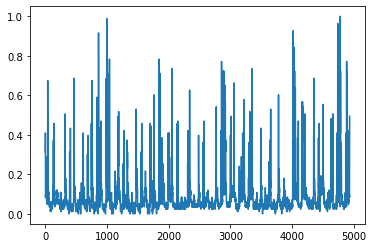

In [9]:
import matplotlib.pyplot as plt
plt.plot(yhat[:,0])
plt.show()
plt.plot (y_norm[:,0])

In [13]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        if torch.cuda.is_available():
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()
        else:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        if torch.cuda.is_available():
            c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()
        else:
            c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [14]:
alpha=2
round(X_train.shape[0]/(alpha * (X_train.shape[1]*2)))

137

In [15]:
torch.manual_seed(1)
alpha = 2
h=round(X_train.shape[0]/(alpha * (X_train.shape[1]*2)))
model = LSTMModel(X_train.shape[1],h, 1,X_train.shape[1],0)
if torch.cuda.is_available():
    model = model.cuda()
else:
    model = model.cuda()
criterion = torch.nn.MSELoss()
print (model.parameters())
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
buffer = 10000
steplr = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)
epochs = 320

min_valid_loss=500
for epoch in range(epochs):
    aux,aux2=0,0
    train_loss=0.0
    model.train()
    for batch, d in enumerate(train_loader):
        if torch.cuda.is_available():
            d =d.cuda()
        optimizer.zero_grad()  #set gradient to 0
        output = model(d.reshape(-1, d.shape[1]).unsqueeze(1))  #make a prediction
        if torch.cuda.is_available():
            loss = criterion(output, y_train_t[aux:aux+d.shape[0]])
        else:
            loss = criterion(output, torch.tensor(y_train_t[aux:aux+d.shape[0]].astype(np.float32)))  #calculate the loss
        loss.backward()  #differentiate loss with respect to parameters
        optimizer.step() #apply the method step and updates the parameters 
        train_loss += loss.item()
        aux+=d.shape[0]
    steplr.step()

    valid_loss = 0.0
    model.eval() 
    for dv in val_loader:  
        if torch.cuda.is_available():
            dv =dv.cuda()  
        target = model(dv.unsqueeze(1))
        if torch.cuda.is_available():
            val_loss = criterion(target, y_val_t[aux2:aux2+dv.shape[0]])
        else:
            val_loss = criterion(target,torch.tensor(y_val_t[aux2:aux2+dv.shape[0]].astype(np.float32)))
        valid_loss += val_loss.item()
        aux2+=dv.shape[0]
    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(val_loader)}')
    if valid_loss < buffer:
        buffer = valid_loss

print (buffer/len(val_loader))   
    #if min_valid_loss > valid_loss:
     #   print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f})')
      #  min_valid_loss = valid_loss

<generator object Module.parameters at 0x00000252A6D93890>
Epoch 1 		 Training Loss: 0.029660492737158227 		 Validation Loss: 0.04431109513555254
Epoch 2 		 Training Loss: 0.013846228884882884 		 Validation Loss: 0.029608932549932174
Epoch 3 		 Training Loss: 0.009178938971700024 		 Validation Loss: 0.024725359664963826
Epoch 4 		 Training Loss: 0.006465489411168746 		 Validation Loss: 0.023322379722126894
Epoch 5 		 Training Loss: 0.005198068738481275 		 Validation Loss: 0.02226583957672119
Epoch 6 		 Training Loss: 0.004435473174296395 		 Validation Loss: 0.021055392122694423
Epoch 7 		 Training Loss: 0.0038967434352920934 		 Validation Loss: 0.01991870387324265
Epoch 8 		 Training Loss: 0.0034915026555636776 		 Validation Loss: 0.0185572293587029
Epoch 9 		 Training Loss: 0.0031437112027625576 		 Validation Loss: 0.017022431255983454
Epoch 10 		 Training Loss: 0.002812543496558074 		 Validation Loss: 0.015496850778747882
Epoch 11 		 Training Loss: 0.0025072426471367554 		 Validation

In [16]:
model.eval()
if torch.cuda.is_available():
    test_norm= torch.tensor(scaler.fit_transform(X_test.values.astype(np.float32))).cuda()
else:
    test_norm= torch.tensor(scaler.fit_transform(X_test.values.astype(np.float32)))
y_norm = scaler.fit_transform(y_test.values)
#yhat=scaler.inverse_transform(model(test_norm.unsqueeze(1)).detach().numpy())
yhat=model(test_norm.unsqueeze(1)).detach().cpu().numpy()
#y=scaler.inverse_transform(test_norm.detach().numpy())[:,0]

from pyFTS.benchmarks import Measures
buffer=[Measures.rmse(y_norm[:,i],yhat[:,i]) for i in range (X.shape[1])]
result = np.mean(buffer)
print (result)

0.026557719809869772


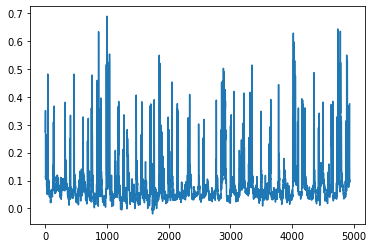

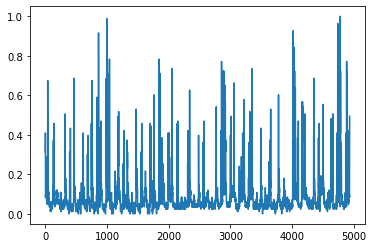

In [12]:
import matplotlib.pyplot as plt
plt.plot(yhat[:,0])
plt.show()
plt.plot (y_norm[:,0])

In [5]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        if torch.cuda.is_available():
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()
        else:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [6]:
torch.manual_seed(1)
alpha = 5
h=round(X_train.shape[0]/(alpha * (X_train.shape[1]*2)))
model = GRUModel(X_train.shape[1],h, 1,X_train.shape[1],0)
if torch.cuda.is_available():
    model = model.cuda()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
buffer = 10000
steplr = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)
epochs = 320

min_valid_loss=500
for epoch in range(epochs):
    aux,aux2=0,0
    train_loss=0.0
    model.train()
    for batch, d in enumerate(train_loader):
        if torch.cuda.is_available():
            d =d.cuda()
        optimizer.zero_grad()  #set gradient to 0
        output = model(d.reshape(-1, d.shape[1]).unsqueeze(1))  #make a prediction
        if torch.cuda.is_available():
            loss = criterion(output, y_train_t[aux:aux+d.shape[0]])
        else:
            loss = criterion(output, torch.tensor(y_train_t[aux:aux+d.shape[0]].astype(np.float32)))  #calculate the loss
        loss.backward()  #differentiate loss with respect to parameters
        optimizer.step() #apply the method step and updates the parameters 
        train_loss += loss.item()
        aux+=d.shape[0]
    steplr.step()
    valid_loss = 0.0
    model.eval() 
    for dv in val_loader: 
        if torch.cuda.is_available():
            dv =dv.cuda()   
        target = model(dv.unsqueeze(1))
        if torch.cuda.is_available():
            val_loss = criterion(target, y_val_t[aux2:aux2+dv.shape[0]])
        else:
            val_loss = criterion(target,torch.tensor(y_val_t[aux2:aux2+dv.shape[0]].astype(np.float32)))
        valid_loss += val_loss.item()
        aux2+=dv.shape[0]
    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(val_loader)}')
    if valid_loss < buffer:
        buffer = valid_loss

print (buffer/len(val_loader))   
    #if min_valid_loss > valid_loss:
     #   print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f})')
      #  min_valid_loss = valid_loss

Epoch 1 		 Training Loss: 0.028110409335133993 		 Validation Loss: 0.04213605512465749
Epoch 2 		 Training Loss: 0.012307369728752312 		 Validation Loss: 0.028216673846223523
Epoch 3 		 Training Loss: 0.008149768449519737 		 Validation Loss: 0.023488873708993198
Epoch 4 		 Training Loss: 0.005860053079952084 		 Validation Loss: 0.02106700451778514
Epoch 5 		 Training Loss: 0.004713995420305427 		 Validation Loss: 0.01933114847966603
Epoch 6 		 Training Loss: 0.00400052283864544 		 Validation Loss: 0.01749589199732457
Epoch 7 		 Training Loss: 0.0034173411028495123 		 Validation Loss: 0.01572123525132026
Epoch 8 		 Training Loss: 0.0029358211189725904 		 Validation Loss: 0.014054764062166214
Epoch 9 		 Training Loss: 0.0025457215677417325 		 Validation Loss: 0.012402191112882325
Epoch 10 		 Training Loss: 0.0022204566222047057 		 Validation Loss: 0.01087946374900639
Epoch 11 		 Training Loss: 0.001945253359440473 		 Validation Loss: 0.00962998852399843
Epoch 12 		 Training Loss: 0.00172

In [7]:
model.eval()
if torch.cuda.is_available():
    test_norm= torch.tensor(scaler.fit_transform(X_test.values.astype(np.float32))).cuda()
else:
    test_norm= torch.tensor(scaler.fit_transform(X_test.values.astype(np.float32)))
y_norm = scaler.fit_transform(y_test.values)
#yhat=scaler.inverse_transform(model(test_norm.unsqueeze(1)).detach().numpy())
yhat=model(test_norm.unsqueeze(1)).detach().cpu().numpy()
#y=scaler.inverse_transform(test_norm.detach().numpy())[:,0]

from pyFTS.benchmarks import Measures
buffer=[Measures.rmse(y_norm[:,i],yhat[:,i]) for i in range (X.shape[1])]
result = np.mean(buffer)
print (result)

0.026242457400147832


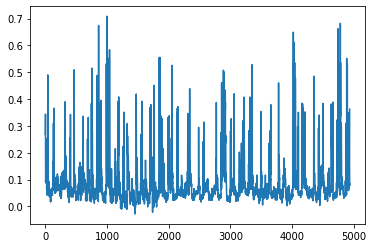

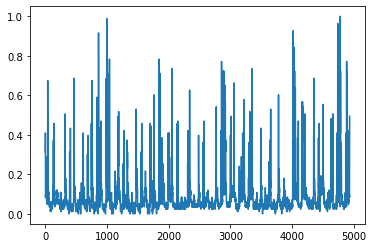

In [8]:
import matplotlib.pyplot as plt
plt.plot(yhat[:,0])
plt.show()
plt.plot (y_norm[:,0])

In [9]:
print (model)

GRUModel(
  (gru): GRU(23, 55, batch_first=True)
  (fc): Linear(in_features=55, out_features=23, bias=True)
)
